# 📘 Week 7 – OGL Individual Activity
## 🧮 Basic Business Analytics with Python (Excel Functions in Code + Graphs + Walkthroughs)

**Goal:** Use Python to replicate Excel functions (`AVERAGE`, `SUMIF`, `COUNTIF`, `IF`, `IFS`) and visualize results. Then replicate these analyses in Excel, document your work, and submit via GitHub.

### 📂 Files Needed (Download from Course Portal)
- `superstore-basic-analytics-full-project.ipynb`
- `Sample - Superstore.csv`
- *(You will also create an Excel version)*

### 🛠️ Step 1: Upload the Dataset
Use this cell to upload the CSV file to Colab.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore (1).csv to Sample - Superstore (1).csv


### 📊 Step 2: Load the Data
We use `pandas` to load the dataset, `numpy` for calculations, and `matplotlib.pyplot` to make graphs.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Sample - Superstore (1).csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### ✅ Task 1: AVERAGE – Average Profit Overall and by Region
**Excel Equivalent:** `=AVERAGE()` and Pivot Table

- First, we calculate the average of all values in the `Profit` column.
- Then, we group data by `Region` and calculate average profit per region.

In [5]:
print('Average Profit:', df['Profit'].mean())
region_avg = df.groupby('Region')['Profit'].mean()
print(region_avg)

Average Profit: 28.65689630778467
Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64


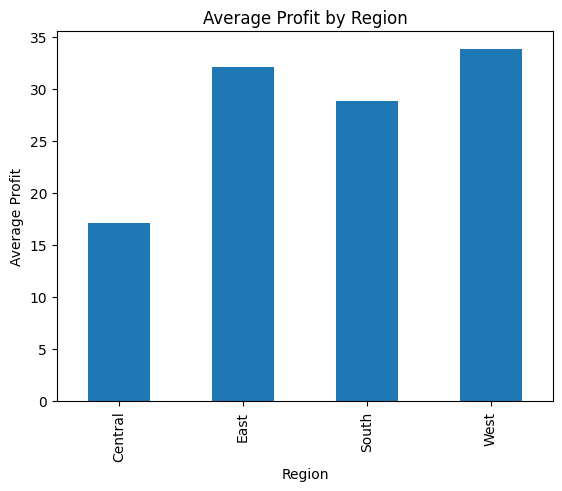

In [6]:
region_avg.plot(kind='bar', title='Average Profit by Region')
plt.ylabel('Average Profit')
plt.show()

### ✅ Task 2: SUMIF – Total Sales in Region 'West'
**Excel Equivalent:** `=SUMIF()`

- We filter the DataFrame for rows where `Region` is `'West'`
- Then, we calculate the sum of the `Sales` column for that subset.

In [7]:
west_sales = df[df['Region'] == 'West']['Sales'].sum()
print('Total Sales in West:', west_sales)

Total Sales in West: 725457.8245


### ✅ Task 3: COUNTIF – Count Orders in 'Technology'
**Excel Equivalent:** `=COUNTIF()`

- We count the number of rows where the `Category` column is `'Technology'` using `.shape[0]`.

In [8]:
tech_orders = df[df['Category'] == 'Technology'].shape[0]
print('Technology Orders:', tech_orders)

Technology Orders: 1847


### ✅ Task 4: IF – 'Performance' Based on Profit
**Excel Equivalent:** `=IF(Profit > 0, 'High', 'Low')`

- We use `np.where()` to assign `'High'` to rows with profit > 0 and `'Low'` otherwise.

In [9]:
df['Performance'] = np.where(df['Profit'] > 0, 'High', 'Low')
df[['Profit', 'Performance']].head()

,Profit,Performance
0,41.9136,High
1,219.5820,High
2,6.8714,High
3,-383.0310,Low
4,2.5164,High


from matplotlib import pyplot as plt
_df_0['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Performance').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Performance'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Profit', y='Performance', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

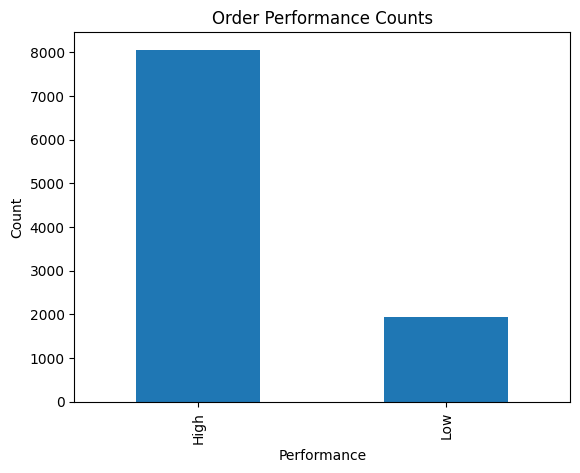

In [10]:
df['Performance'].value_counts().plot(kind='bar', title='Order Performance Counts')
plt.ylabel('Count')
plt.show()

### ✅ Task 5: IFS – Profit Tier Classification
**Excel Equivalent:** `=IFS()` or nested `=IF()`

- We define ranges using `np.select()`:
  - Profit < 0 → 'Loss'
  - 0 ≤ Profit ≤ 500 → 'Low'
  - 500 < Profit ≤ 2000 → 'Medium'
  - Profit > 2000 → 'High'

In [11]:
conditions = [
    (df['Profit'] < 0),
    (df['Profit'] >= 0) & (df['Profit'] <= 500),
    (df['Profit'] > 500) & (df['Profit'] <= 2000),
    (df['Profit'] > 2000)
]
choices = ['Loss', 'Low', 'Medium', 'High']
df['Profit Tier'] = np.select(conditions, choices, default='Unknown')
df[['Profit', 'Profit Tier']].head()

,Profit,Profit Tier
0,41.9136,Low
1,219.5820,Low
2,6.8714,Low
3,-383.0310,Loss
4,2.5164,Low


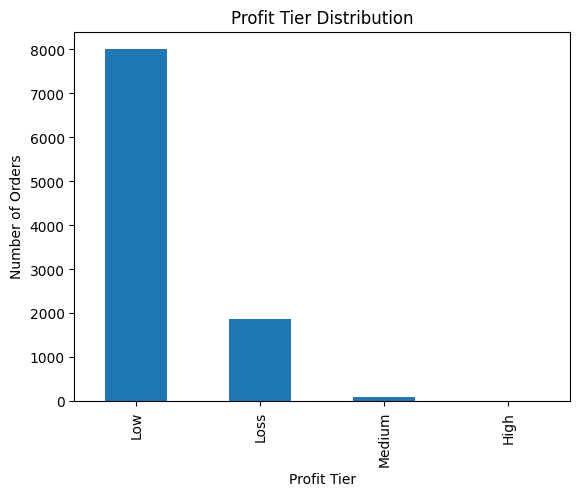

In [12]:
df['Profit Tier'].value_counts().plot(kind='bar', title='Profit Tier Distribution')
plt.ylabel('Number of Orders')
plt.show()

### ✅ Task 6: Total Sales per Category
**Excel Equivalent:** Pivot Table with SUM on Sales by Category

In [13]:
category_sales = df.groupby('Category')['Sales'].sum()
print(category_sales)

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


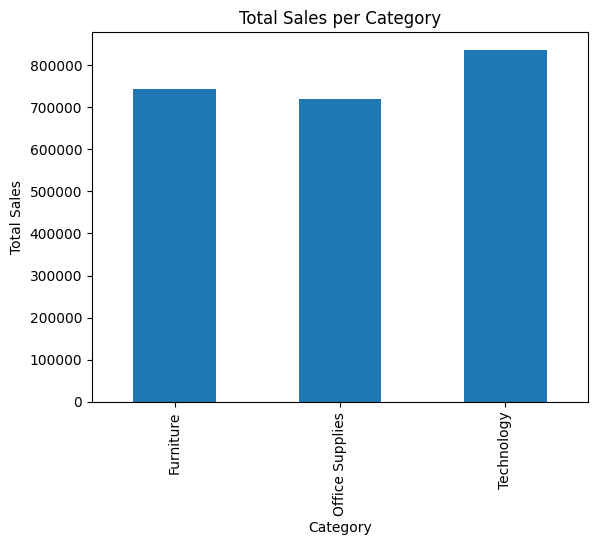

In [14]:
category_sales.plot(kind='bar', title='Total Sales per Category')
plt.ylabel('Total Sales')
plt.show()

### ✅ Task 7: Number of Orders by Ship Mode
**Excel Equivalent:** Pivot Table COUNT on Ship Mode

In [15]:
shipmode_counts = df['Ship Mode'].value_counts()
print(shipmode_counts)

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


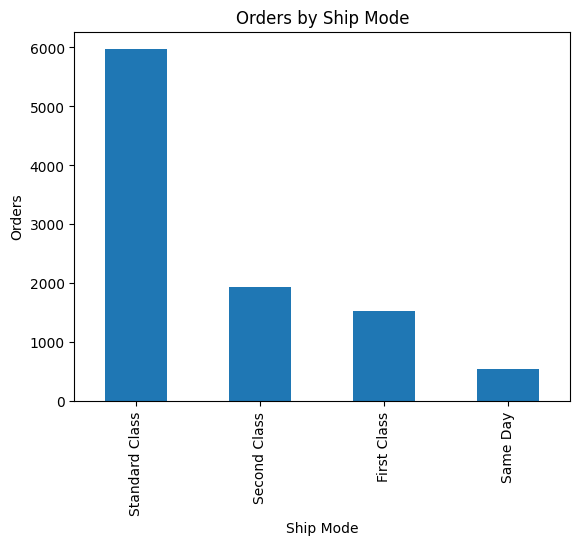

In [16]:
shipmode_counts.plot(kind='bar', title='Orders by Ship Mode')
plt.ylabel('Orders')
plt.show()

### 🔁 Part 2: Do All Tasks in Excel Too
Open `Sample - Superstore.csv` in Excel and replicate:

- AVERAGE: `=AVERAGE()`
- SUMIF, COUNTIF
- IF for performance
- IFS or nested IF for profit tier
- Pivot Tables for sales and ship mode

📁 Save your Excel file as: `superstore-basic-analytics-yourname.xlsx`

### 📁 GitHub Submission Instructions
1. Create repo: `week7-basic-analytics-yourname`
2. Upload:
- `.ipynb` (this notebook)
- `.xlsx` Excel file
- `README.md`
- (Optional) CSV dataset
3. Make repo **Public**
4. Submit GitHub link in course portal

### 📝 README.md Template

```markdown
# Week 7 – Basic Business Analytics Project

**Student:** Your Name  
**Course:** CPSC 201 – Business Information Systems

## 🔍 Summary
Replicated Excel functions in Python and visualized data using Pandas and Matplotlib.

## 📁 Files
- .ipynb (Python version)
- .xlsx (Excel version)
- CSV (optional)

## 📊 Insights
- West had highest sales
- Standard Class was most used shipping

## 💡 Python vs Excel
- Python is efficient for logic
- Excel is visual but manual

## ✅ How to Use
Run notebook top to bottom. Open Excel file to compare.
```

### ✅ Submission Checklist
- [ ] Notebook completed and saved
- [ ] Excel file created
- [ ] README.md written
- [ ] GitHub repo public and submitted